In [17]:
%pip install -q -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [18]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from scipy import stats

In [19]:
f = np.array([[0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 180, 90, 90, 180, 90, 0],
             [0, 0, 180, 90, 180, 180, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0]])

k = (1/9)*np.array([[1, 1, 1],
                    [1, 1, 1],
                    [1, 1, 1]])
g = cv.filter2D(f.astype(np.float32), -1, k.astype(np.float32))
print(g)

[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 20. 30. 40. 40. 40. 30. 20.]
 [ 0. 40. 60. 90. 90. 80. 50. 20.]
 [ 0. 40. 60. 90. 90. 80. 50. 20.]
 [ 0. 20. 30. 50. 50. 40. 20.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]


#### 1. Averaging using filter2d

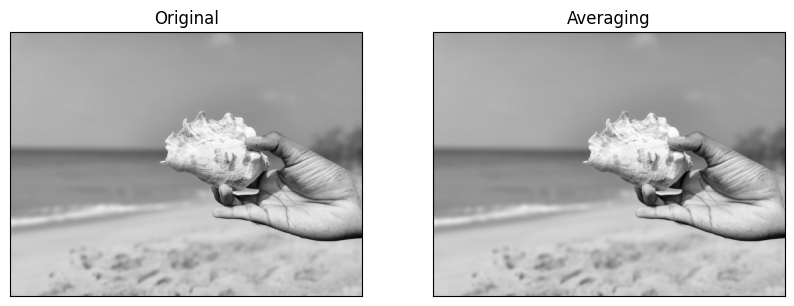

In [20]:
im = cv.imread('images/seashell.jpg', cv.IMREAD_REDUCED_GRAYSCALE_2)
assert im is not None

kernel = np.ones((3, 3), np.float32)/9
imavg = cv.filter2D(im, cv.CV_32F, kernel)

fig, axes = plt.subplots(1,2, sharex='all', sharey='all', figsize=(10, 6))
axes[0].imshow(im, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(imavg, cmap='gray')
axes[1].set_title('Averaging')
axes[1].set_xticks([]), axes[1].set_yticks([])

plt.show()

#### 2. Sobel Filtering

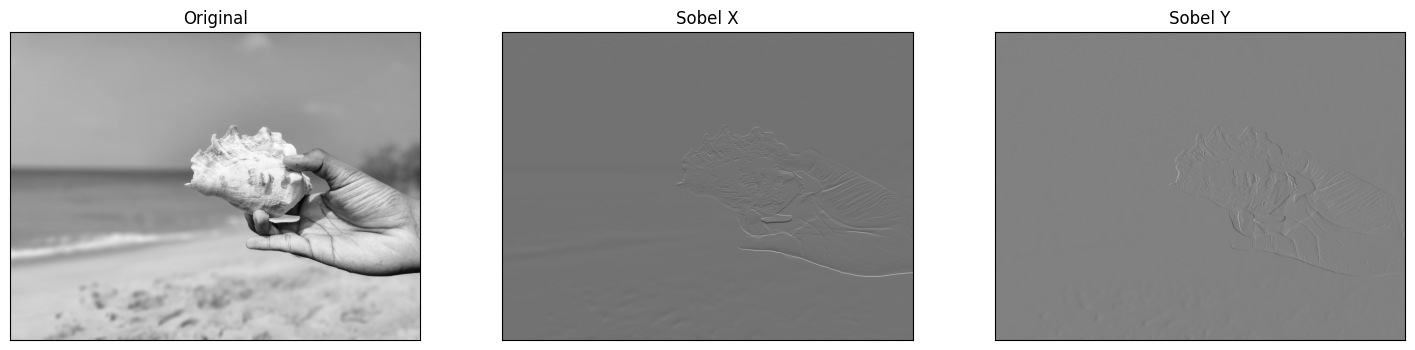

In [21]:
im1 = cv.imread('images/seashell.jpg', cv.IMREAD_REDUCED_GRAYSCALE_2)
assert im is not None

sobel_x = np.array([[-1,-2,-1], [0,0,0], [1,2,1]])
sobel_y = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])

im_x = cv.filter2D(im1, cv.CV_32F, sobel_x)
im_y = cv.filter2D(im1, cv.CV_32F, sobel_y)

fig, axes = plt.subplots(1,3, sharex='all', sharey='all', figsize=(18, 6))
axes[0].imshow(im1, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im_x, cmap='gray')
axes[1].set_title('Sobel X')
axes[1].set_xticks([]), axes[1].set_yticks([])
axes[2].imshow(im_y, cmap='gray')
axes[2].set_title('Sobel Y')
axes[2].set_xticks([]), axes[2].set_yticks([])

plt.show()

#### 3. Smoothing with a Box Filter and Gaussian Filter

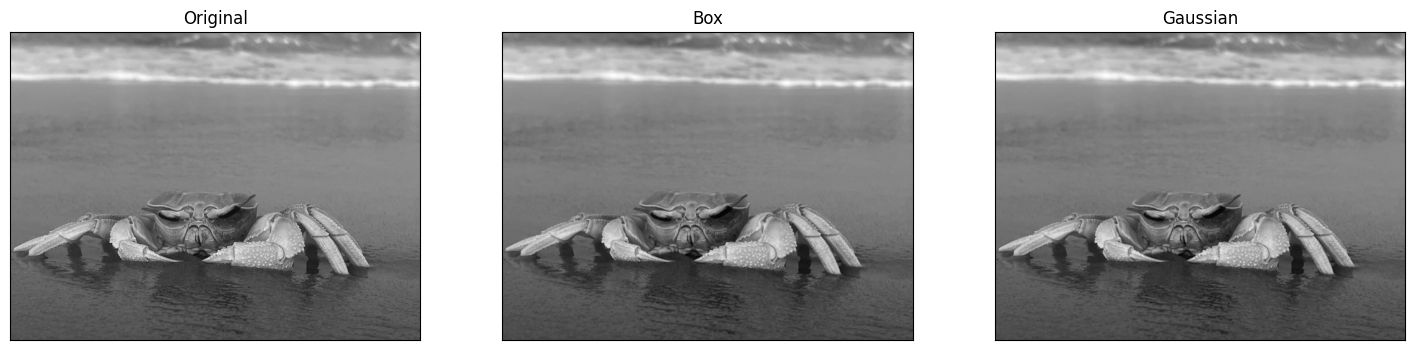

In [27]:
im2 = cv.imread('images/crab.jpg', cv.IMREAD_GRAYSCALE)

# Box filter
box = 1./81.*np.ones((9,9)) # since 9,9 matrix the scaler should be 1/(9*9)
imgb = cv.filter2D(im2, -1, box)

# Gaussian filter
gauss = cv.getGaussianKernel(9,4) # (9, 1) column vector of gauss
imgg = cv.sepFilter2D(im2, -1, gauss, gauss) # gauss in x axis, gauss in y axis

fig, axes = plt.subplots(1,3, sharex='all', sharey='all', figsize=(18, 6))
axes[0].imshow(im2, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(imgb, cmap='gray')
axes[1].set_title('Box')
axes[1].set_xticks([]), axes[1].set_yticks([])
axes[2].imshow(imgg, cmap='gray')
axes[2].set_title('Gaussian')
axes[2].set_xticks([]), axes[2].set_yticks([])

plt.show()
